# **Actividad 4.1** - Segmentación de clientes según datos bancarios

El objeto de esta actividad es participar en la competición de ofrecida de la web de Kaagle denominada: Credit Card Dataset for Clustering

- **Título**: Credit Card Dataset for Clustering
- **Url**: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

El ejercicio consiste en agrupar a los clientes de tarjetas de crédito en varios grupos de acuerdo con su comportamiento para obtener una serie de cluster que pueden ser utilizados para 
desarrollar una campaña de Marketing.

Se deberán obtener algunas conclusiones sobre los perfiles de los clientes en cada cluster.

Ejemplo de referencia a considerar:

- **Título**: Clustering for Effective Marketing Strategy
- **Url**: https://www.kaggle.com/code/caesarmario/clustering-for-effective-marketing-strategy



## La rúbrica a utilizar para evaluar

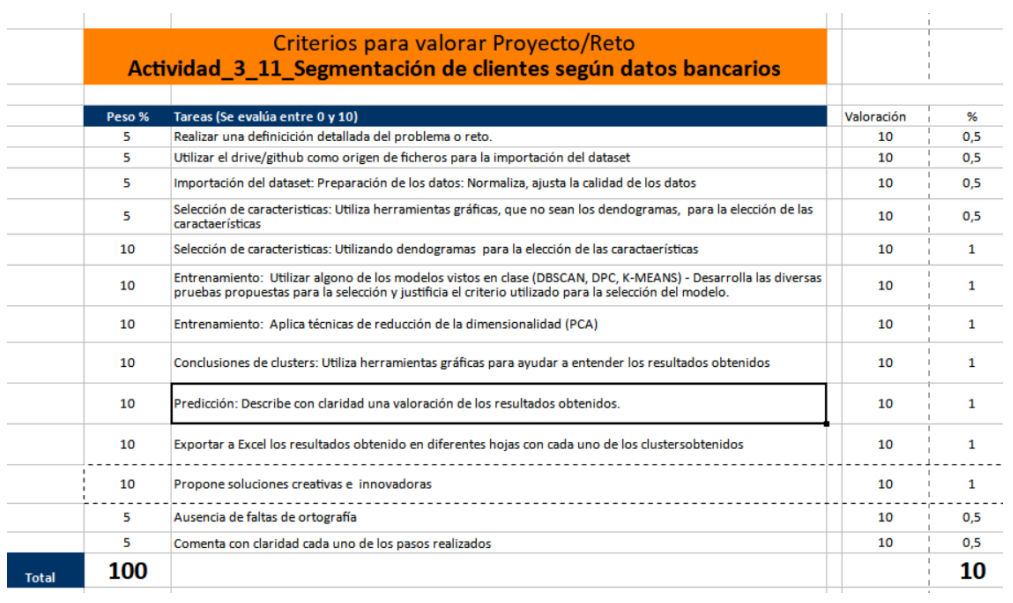

## Descripción del problema o reto

El objetivo del reto consiste en desarrollar una segmentación de clientes para obtener conclusiones sobre los perfiles de los clientes en cada cluster, lo que permitirá definir estrategias de marketing adecuadas para cada grupo. El dataset proporcionado cuenta con información de alrededor de 9000 usuarios activos de tarjetas de crédito durante los últimos 6 meses. Se encuentra en un nivel de cliente y contiene 18 variables de comportamiento

A continuación se muestra el conjunto de datos del diccionario de datos para tarjetas de crédito:

- `CUST_ID` : Identificación del titular de la Tarjeta de Crédito (Categórica)

- `BALANCE`: Monto de saldo que queda en su cuenta para realizar compras

- `BALANCE_FREQUENCY`: Con qué frecuencia se actualiza el Saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)

- `PURCHASES`: Importe de las compras realizadas desde la cuenta

- `ONEOFF_PURCHASES`: Monto máximo de compra realizado de una sola vez

- `INSTALLMENTS_PURCHASES`: Importe de la compra realizada a plazos

- `CASH_ADVANCE`: Efectivo por adelantado dado por el usuario

- `PURCHASES_FREQUENCY`: Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compra frecuente, 0 = compra no frecuente)

- `ONEOFFPURCHASESFREQUENCY`: Con qué frecuencia se realizan compras de una sola vez (1 = compra frecuente, 0 = compra no frecuente)

- `PURCHASESINSTALLMENTSFREQUENCY` : Frecuencia con la que se realizan las compras a plazos (1 = frecuente, 0 = no frecuente)

- `CASHADVANCEFREQUENCY`: Con qué frecuencia se paga el anticipo de efectivo

- `CASHADVANCETRX`: Número de Transacciones realizadas con "Cash in Advanced"

- `PURCHASES_TRX`: Número de transacciones de compra realizadas

- `CREDIT_LIMIT`: Límite de tarjeta de crédito para el usuario

- `PAYMENTS`: Importe del pago realizado por el usuario

- `MINIMUM_PAYMENTS`: Cantidad mínima de pagos realizados por el usuario

- `PRCFULLPAYMENT`: Porcentaje del pago total pagado por el usuario

- `TENURE`: Tenencia del servicio de tarjeta de crédito para el usuario

## Importación de Datos

In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# Importación de los datos

github = 'https://raw.githubusercontent.com/hectorOliSan/SNS/main/UT4%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20no%20supervisado/Actividad%204.1%20-%20Segmentaci%C3%B3n%20de%20clientes%20seg%C3%BAn%20datos/'

df = pd.read_csv(github + 'CC%20GENERAL.csv')

In [3]:
# Dataframe inicial a utilizar

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# Dimensiones del Dataframe

df.shape

(8950, 18)

Es útil para verificar el tamaño del conjunto de datos antes de realizar operaciones o manipulaciones en él.

In [5]:
# Nombres de las columnas del Dataframe

df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Esta información puede ser útil cuando se desea realizar operaciones en una o más columnas específicas en el DataFrame.

In [6]:
# Información resumida sobre el Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Esta información es útil para entender mejor el contenido y la estructura de un DataFrame, especialmente si se está trabajando con un dataset grande o complejo.

In [7]:
# Estadísticas descriptivas del Dataframe

df.describe().applymap('{:.2f}'.format)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.63,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


Las estadísticas descriptivas incluyen el recuento de valores, la media, la desviación estándar, el valor mínimo, el percentil 25, el percentil 50 (mediana), el percentil 75 y el valor máximo para cada columna numérica del DataFrame.

Es una herramienta útil para resumir estadísticamente los datos en un DataFrame, proporcionando una visión general rápida de los valores clave de las variables numéricas. Además, útil para entender la distribución de los datos y detectar valores atípicos en el DataFrame.

## Preparación y Edición del Dataframes

**Preparación de Datos**: La preparación de datos es una de las fases más importantes en cualquier proyecto de análisis de datos. Esta fase implica la recopilación (no siendo necesario, en este caso, ya que se nos han proporcionado los dataframes), limpieza, transformación y selección de datos necesarios para su análisis.

Entre las tareas de preparación de datos se encuentran:

1. Limpieza de datos: se deben eliminar los datos duplicados, incompletos o inconsistentes del conjunto de datos.

2. Transformación de datos: se deben transformar los datos para que sean compatibles con el modelo que se va a utilizar. Por ejemplo, conversión de valores categóricos a numéricos, escalado o normalización los datos.

3. Selección de características: se deben seleccionar las características que mejor se ajusten al modelo.

Una vez realizado la preparación de los datos, se procedería a la fase de entrenamiento del modelo de predicción.

### Valores Nulos

In [8]:
# Verifica si hay valores nulos en el Dataframe
df.isnull().values.any()

True

In [9]:
# Número de valores nulos en el Dataframe
df.isnull().values.sum()

314

In [10]:
# Columnas que contienen valores nulos
df.columns[df.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

In [11]:
# Rellena los valores nulos con la media de la columna correspondiente

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [12]:
# Verifica si todavía hay valores nulos en el Dataframe
len(df.columns[df.isnull().any()])

0

In [13]:
# Dataframe el relleno de datos

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Transformación de Datos

#### Eliminación de valores categóricos

Es común que los datos se presenten en diferentes formatos, como valores categóricos o numéricos. En algunos casos, los algoritmos de aprendizaje automático solo pueden trabajar con datos numéricos, lo que significa que es necesario convertir los valores categóricos en números.

La conversión de datos categóricos a numéricos implica asignar un número a cada categoría única. Esto permite que los algoritmos de aprendizaje automático trabajen con los datos de manera más efectiva y precisa. **En este caso, como no son datos representativos se opta por la eliminación de ellos**.

In [14]:
# Selección de las columnas categóricas del DataFrame

cust_id = df.select_dtypes(include = 'object')
cust_id

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


In [15]:
# Elimina la columna "CUST_ID" del DataFrame

df = df.drop(columns = 'CUST_ID')

In [16]:
# Dataframe tras los valores categóricos no necesarios

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Escalado

In [17]:
from sklearn.preprocessing import MaxAbsScaler

# Crea un objeto MaxAbsScaler

scaler = MaxAbsScaler()

# Ajuste y transformación de los datos de entrenamiento y prueba

df_e = pd.DataFrame(columns=df.columns)
df_e[df.columns] = scaler.fit_transform(df)

El escalado absoluto máximo, **MaxAbsScaler**: es un método de escalado utilizado en el preprocesamiento de datos en el aprendizaje automático. La idea detrás de MaxAbsScaler es escalar los datos de modo que el valor absoluto más grande de cada característica sea 1.

MaxAbsScaler es útil cuando se trabaja con datos que tienen valores extremadamente altos en algunas características y valores muy bajos en otras. Al escalar los datos, se pueden evitar problemas relacionados con la diferencia de magnitudes entre las características.

In [18]:
# Dataframe tras el escalado de datos

df_e

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.080893,0.014035,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,0.011311,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.006419,0.000640,0.500000,0.5
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.005439,0.011311,0.000000,0.5
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.033333,0.001602,0.001079,0.250000,0.5
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.016667,0.001036,0.000730,0.250000,0.5


## Visualización de los datos

In [19]:
# Estadísticas descriptivas del Dataframe

df_e.describe().applymap('{:.2f}'.format)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,0.08,0.88,0.02,0.01,0.02,0.02,0.49,0.20,0.36,0.09,0.03,0.04,0.15,0.03,0.01,0.15,0.96
std,0.11,0.24,0.04,0.04,0.04,0.04,0.40,0.30,0.40,0.13,0.06,0.07,0.12,0.06,0.03,0.29,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50
25%,0.01,0.89,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.00,1.00
50%,0.05,1.00,0.01,0.00,0.00,0.00,0.50,0.08,0.17,0.00,0.00,0.02,0.10,0.02,0.00,0.00,1.00
75%,0.11,1.00,0.02,0.01,0.02,0.02,0.92,0.30,0.75,0.15,0.03,0.05,0.22,0.04,0.01,0.14,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Matriz de correlación

In [20]:
# Matriz de correlación del Dataframe de train

mc = df_e.corr()
mc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


La **matriz de correlación** es una herramienta utilizada para analizar la relación entre dos o más variables en un conjunto de datos. Es una tabla que muestra la correlación entre todas las posibles combinaciones de pares de variables. Las correlaciones pueden variar de -1 a 1, donde -1 indica una correlación negativa perfecta, 0 indica ausencia de correlación y 1 indica una correlación positiva perfecta.

La matriz de correlación es útil porque proporciona información sobre cómo las variables están relacionadas entre sí. Sin embargo, cuando se trabaja con un gran número de variables, puede ser difícil de interpretar visualmente. Por lo tanto, se utiliza un mapa de calor para visualizar la matriz de correlación.

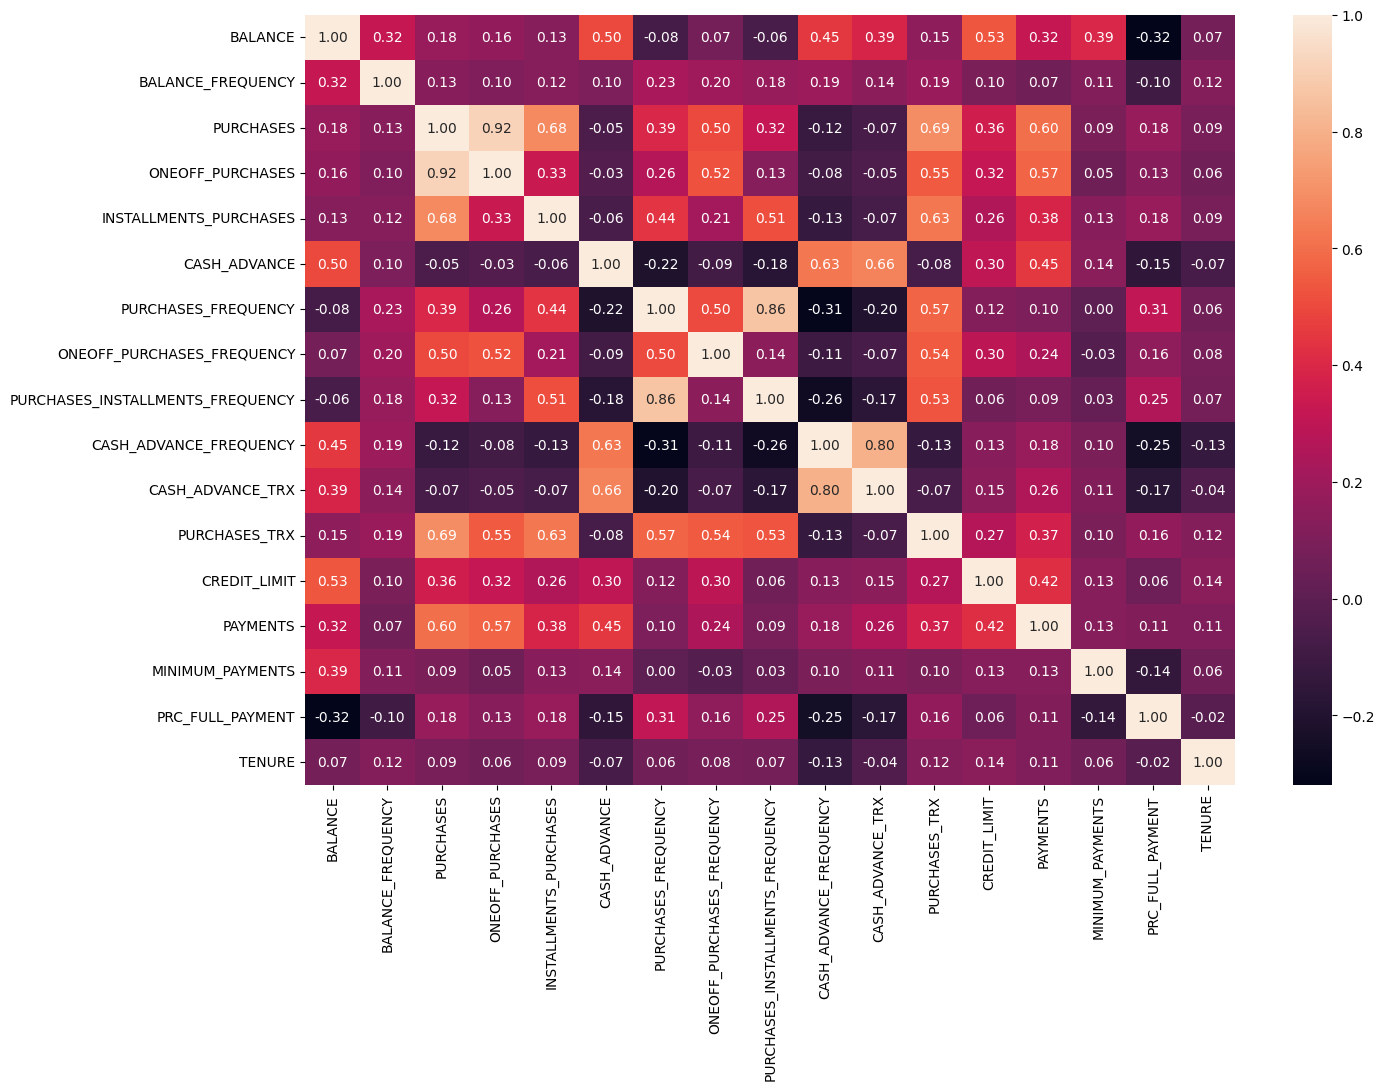

In [21]:
# Matriz de correlación como un mapa de calor del Dataframe de train

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mc, annot=True, fmt=".2f")
plt.show()

El mapa de calor es una forma de visualizar los datos de la matriz de correlación utilizando colores. Los valores de correlación más altos se representan en un color más oscuro, mientras que los valores de correlación más bajos se representan en un color más claro. El mapa de calor es útil porque permite visualizar rápidamente las relaciones entre las variables y resaltar patrones que pueden ser difíciles de detectar en una tabla de números.

Además, el mapa de calor es una forma eficiente de identificar variables altamente correlacionadas, lo que puede ser útil en la selección de variables para el análisis o modelado. Si dos variables están altamente correlacionadas, es posible que solo se necesite una de ellas en el modelo para explicar la variabilidad de los datos. Esto puede ayudar a simplificar el modelo y reducir la complejidad.

### Histograma

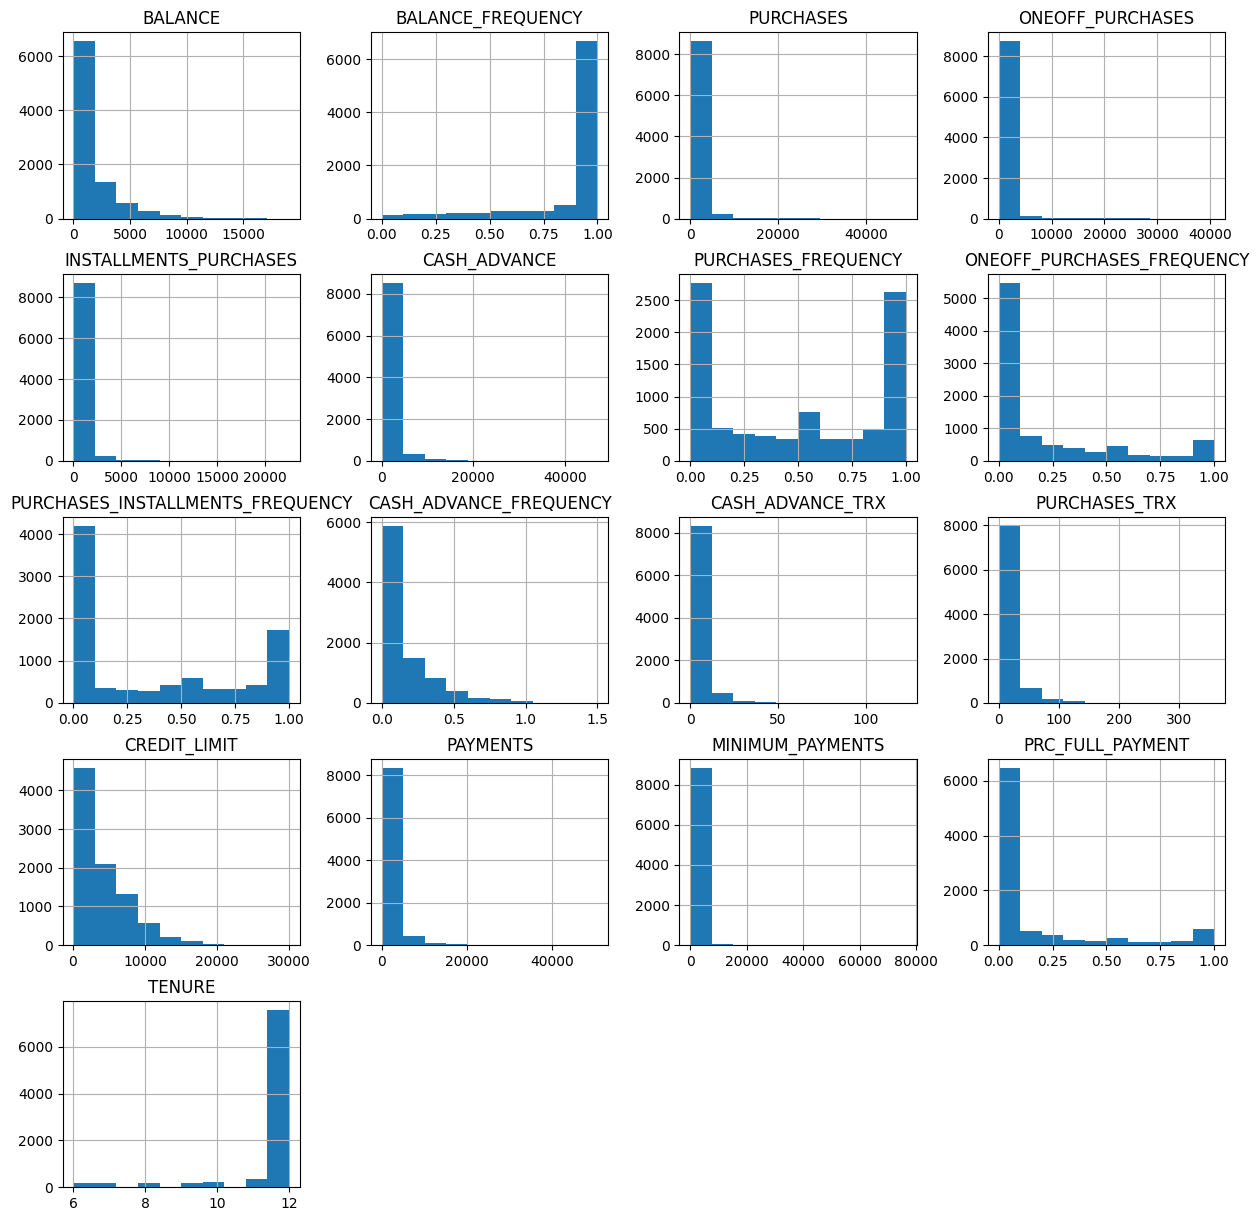

In [22]:
# Histogramas del Dataframe train

df.hist(figsize=(15, 15))
plt.show()

El **histograma** es una técnica común utilizada en análisis de datos y estadísticas para representar la distribución de frecuencia de un conjunto de datos. Consiste en una gráfica de barras verticales que muestra la frecuencia de ocurrencia de cada valor o rango de valores en un conjunto de datos. Los valores se agrupan en intervalos y la altura de cada barra representa la frecuencia de valores que se encuentran en ese intervalo.

El histograma es una herramienta muy útil para visualizar la forma de la distribución de los datos y para identificar valores atípicos o extremos. Por ejemplo, si el histograma muestra una distribución normal, con la mayoría de los valores centrados alrededor de la media, es posible que se puedan aplicar técnicas estadísticas para analizar los datos de manera más precisa. Si hay valores extremos, como picos altos o bajos en la distribución, esto puede indicar la presencia de valores atípicos o errores en los datos, lo que puede afectar la calidad del análisis o del modelo de aprendizaje automático.

### Dendograma

Distancia Media: 37.29


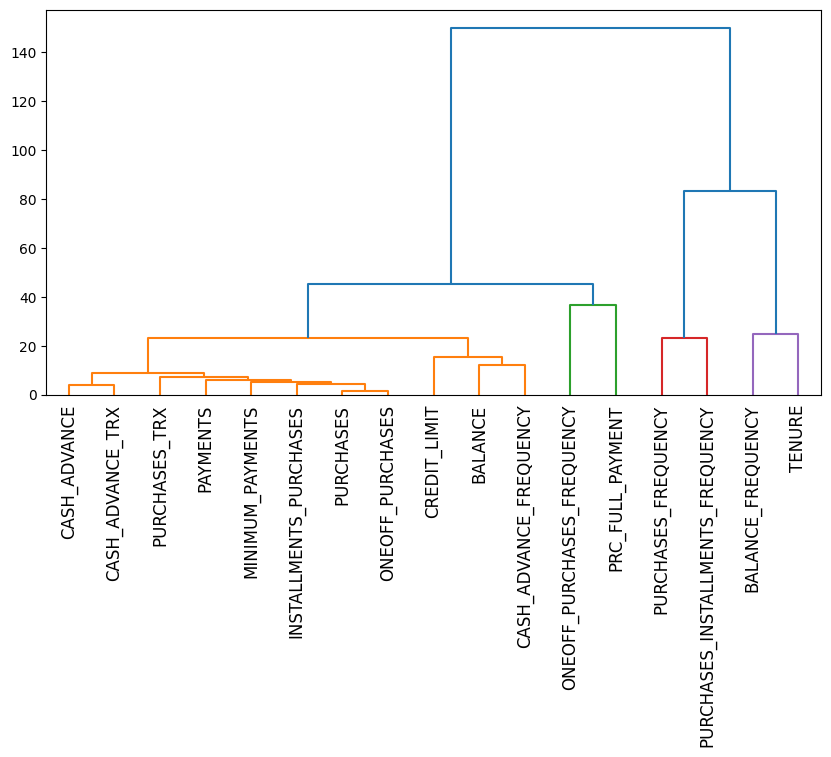

In [23]:
from scipy.cluster import hierarchy

# Matriz de distancia
d = hierarchy.distance.pdist(df_e.T)
avD = np.average(d)
print("Distancia Media:{:6.2f}".format(avD))

# Calculo del dendrograma
Z = hierarchy.linkage(d, 'ward')

# Dibujo del dendrograma
plt.figure(figsize=(10, 5))
labels = df_e.columns.to_list()
dn = hierarchy.dendrogram(Z, color_threshold=avD, labels=labels, leaf_rotation=90)
plt.show()

Un **dendrograma** es una representación gráfica de las similitudes y diferencias entre diferentes objetos/características o grupos de objetos/características. Los objetos/características o grupos se muestran como nodos, y las conexiones entre ellos representan la similitud o distancia entre ellos. Es un concepto totalmente diferente a la correlación de variables.

Es un tipo de diagrama en forma de árbol utilizado en análisis de clustering ( Crear grupos en aprendizaje no supervisado que veremos más adelante), pero que lo podemos utilizar para analizar las similitudes/cercanía entre características.

## Entrenamiento

### Modelo 1: DBSCAN

**DBSCAN** - Clustering espacial basado en la densidad de aplicaciones con ruido. Encuentra muestras de núcleos de alta densidad y expande grupos a partir de ellos. Bueno para datos que contienen grupos de densidad similar.

Es un algoritmo no paramétrico de clustering basado en la densidad: dado un conjunto de puntos en algún espacio, agrupa puntos que están estrechamente empaquetados (puntos con muchos vecinos cercanos), marcando como valores atípicos los puntos que se encuentran solos en regiones de baja densidad (cuyos vecinos más cercanos están demasiado lejos). DBSCAN es uno de los algoritmos de clustering más comunes y también el más citado en la literatura científica.

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=8)
clusters = dbscan.fit_predict(df_e)

# Agregar la columna de cluster al DataFrame original
df['DBSCAN'] = clusters

# Agrupar el DataFrame por cluster y seleccionar los clientes de cada cluster
for cluster_id, group in df.groupby('DBSCAN'):
  print(f"Clientes del cluster {cluster_id}:")
  print(group)

Clientes del cluster -1:
           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
21     6369.531318           1.000000    6359.95           5910.04   
23     3800.151377           0.818182    4248.35           3454.56   
28     7152.864372           1.000000     387.05            204.55   
30    12136.219960           1.000000    3038.01           1013.20   
34     3517.101616           0.727273     547.28              0.00   
...            ...                ...        ...               ...   
8939    728.352548           1.000000     734.40            734.40   
8941   5967.475270           0.833333     214.55              0.00   
8944    193.571722           0.833333    1012.73           1012.73   
8948     13.457564           0.833333       0.00              0.00   
8949    372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
21                    449.91    229.028245             1.000000   


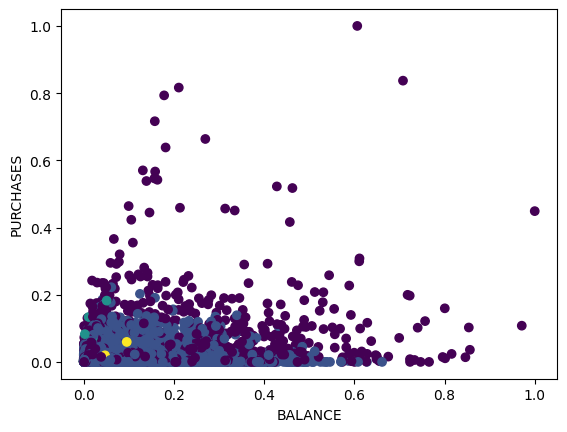

In [25]:
plt.scatter(df_e['BALANCE'], df_e['PURCHASES'], c=clusters)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

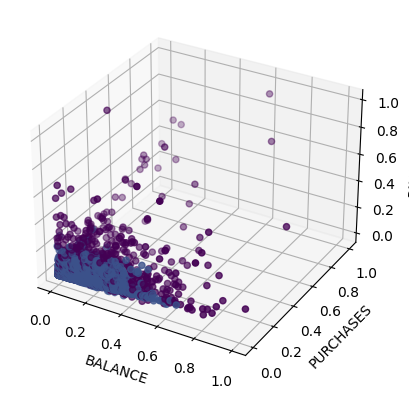

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_e['BALANCE'], df_e['PURCHASES'], df_e['PAYMENTS'], c=clusters)
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
ax.set_zlabel("PAYMENTS")
plt.show()

In [27]:
df['DBSCAN'].unique()

array([ 0, -1,  1,  2,  3])

In [28]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


## Modelo 2: DBSCAN + PCA

El análisis de componentes principales, o **PCA**, es un procedimiento estadístico que le permite resumir el contenido de la información en grandes tablas de datos por medio de un conjunto más pequeño de "índices de resumen" que se pueden visualizar y analizar más fácilmente.

In [29]:
from sklearn.decomposition import PCA

# Aplica el análisis de componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_e)
print(pca.explained_variance_ratio_) 

# Muestra el nuevo dataset
df_pca

[0.52510525 0.14824222]


array([[-0.48469621, -0.10924424],
       [-0.61125485, -0.02658214],
       [ 0.30190437,  0.92046511],
       ...,
       [ 0.38731358, -0.33506662],
       [-0.61982328, -0.11262504],
       [-0.06817728,  0.49559098]])

In [30]:
# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df_e.columns)

,PC-1,PC-2
BALANCE,-0.015251,0.090440
BALANCE_FREQUENCY,0.101253,0.245932
PURCHASES,0.032786,0.048019
ONEOFF_PURCHASES,0.019957,0.059297
INSTALLMENTS_PURCHASES,0.035314,-0.002797
CASH_ADVANCE,-0.016866,0.012734
PURCHASES_FREQUENCY,0.686006,0.083990
ONEOFF_PURCHASES_FREQUENCY,0.242393,0.835606
PURCHASES_INSTALLMENTS_FREQUENCY,0.637588,-0.433973
CASH_ADVANCE_FREQUENCY,-0.073872,0.054138


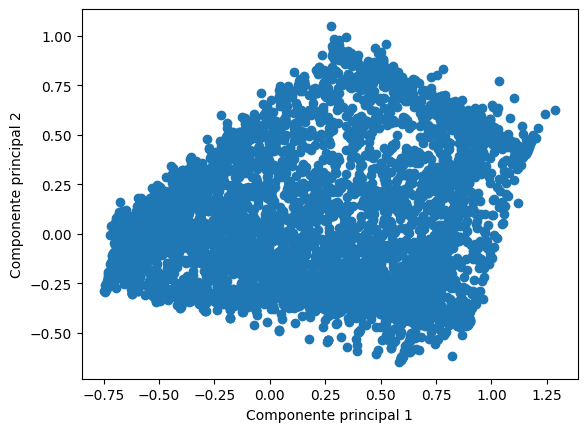

In [31]:
# Graficar los datos reducidos a 2 dimensiones
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [32]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(df_pca)

# Agregar la columna de cluster al DataFrame original
df['PCA'] = clusters

# Agrupar el DataFrame por cluster y seleccionar los clientes de cada cluster
for cluster_id, group in df.groupby('PCA'):
    print(f"Clientes del cluster {cluster_id}:")
    print(group)

Clientes del cluster 0:
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1            

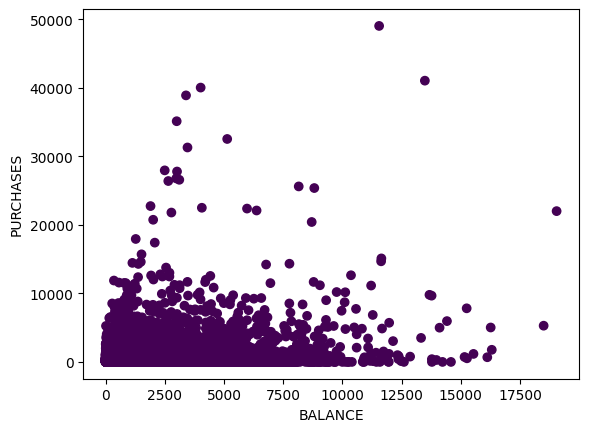

In [33]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=clusters)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

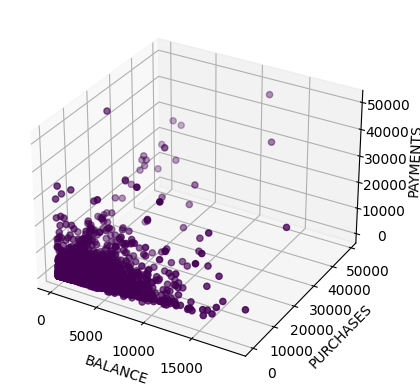

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['BALANCE'], df['PURCHASES'], df['PAYMENTS'], c=clusters)
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
ax.set_zlabel("PAYMENTS")
plt.show()

In [35]:
df['PCA'].unique()

array([0])

In [36]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN,PCA
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0


## Exportación en formato excel

In [37]:
def exportar(cluster):
  # Creación del Dataframe a exportar
  df_export = pd.DataFrame({
    'CUST_ID': cust_id['CUST_ID'], 
    cluster: df[cluster]
  })

  output = cluster.lower() + '.xlsx'

  # Exporta los datos a un archivo de Excel
  df_export.to_excel(output, index=False)

  # Descarga el archivo de Excel a tu computadora local
  files.download(output)

exportar('DBSCAN')
exportar('PCA')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>